In [3]:
from google.colab import files
uploaded = files.upload()

Saving sms dataset.zip to sms dataset.zip


ABHISHEK J - 24BAD002
First 5 rows:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Accuracy: 0.9721973094170404
Precision: 0.8650306748466258
Recall: 0.94
F1 Score: 0.9009584664536742

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       965
           1       0.87      0.94      0.90       150

    accuracy                           0.97      1115
   macro avg       0.93      0.96      0.94      1115
weighted avg       0.97      0.97      0.97      1115



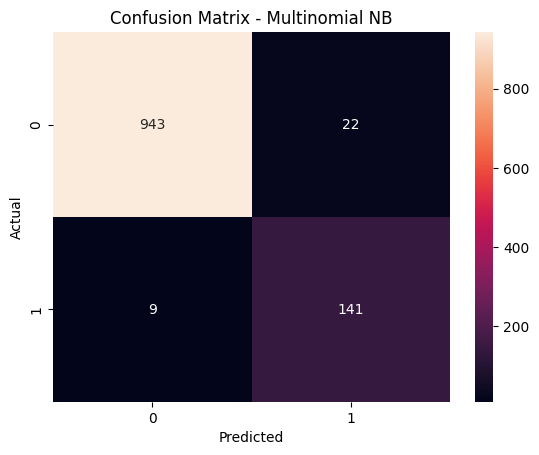


Some Misclassified Messages:
  label                                            message
0   ham  go until jurong point  crazy   available only ...
0   ham  go until jurong point  crazy   available only ...
0   ham  go until jurong point  crazy   available only ...
0   ham  go until jurong point  crazy   available only ...
0   ham  go until jurong point  crazy   available only ...

Top 10 Words Influencing Spam:
prize
www
reply
text
claim
stop
mobile
ur
txt
free

Total Spam Words: 10066
Total Ham Words: 33359


In [4]:
print("ABHISHEK J - 24BAD002")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
zip_path = r"sms dataset.zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("sms_data")
df = pd.read_csv("sms_data/spam.csv", encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'message']
print("First 5 rows:")
print(df.head())
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    return text
df['message'] = df['message'].apply(clean_text)
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['message'])
le = LabelEncoder()
y = le.fit_transform(df['label'])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
model = MultinomialNB(alpha=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix - Multinomial NB")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
misclassified = df.iloc[X_test.nonzero()[0]]
print("\nSome Misclassified Messages:")
print(misclassified.head())
feature_names = vectorizer.get_feature_names_out()
spam_prob = model.feature_log_prob_[1]
top10 = np.argsort(spam_prob)[-10:]
print("\nTop 10 Words Influencing Spam:")
for i in top10:
    print(feature_names[i])
spam_msgs = df[df['label']=='spam']['message']
ham_msgs = df[df['label']=='ham']['message']
spam_vec = CountVectorizer(stop_words='english')
ham_vec = CountVectorizer(stop_words='english')
spam_counts = spam_vec.fit_transform(spam_msgs)
ham_counts = ham_vec.fit_transform(ham_msgs)
print("\nTotal Spam Words:", spam_counts.sum())
print("Total Ham Words:", ham_counts.sum())